# Importig Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/9_decision_tree/Exercise/titanic.csv')


In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
df = df[['Survived','Pclass','Sex','Age','Fare']]

In [13]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


# Cleaning DataSet

In [16]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [20]:
df.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [22]:
df['Age'] = df.groupby('Sex')['Age'].transform(lambda x: x.fillna(x.mean()))

C:\Users\Khan2\AppData\Local\Temp\ipykernel_14372\292441871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df.groupby('Sex')['Age'].transform(lambda x: x.fillna(x.mean()))


In [29]:
# changing category column to numerical column
from sklearn.preprocessing import LabelEncoder

In [31]:
le = LabelEncoder()

In [33]:
df['Sex'] = le.fit_transform(df.Sex)

C:\Users\Khan2\AppData\Local\Temp\ipykernel_14372\3123237101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = le.fit_transform(df.Sex)


In [35]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [37]:
x = df[['Pclass','Sex','Age','Fare']]
y = df['Survived']

# Doing train_test split

In [40]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [44]:
# Traing the mode
from sklearn.tree import DecisionTreeClassifier

In [46]:
clf = DecisionTreeClassifier(random_state=0,criterion='gini')
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [48]:
# Checking accuracy of test dataset
from sklearn.metrics import accuracy_score

In [50]:
predictions_test = clf.predict(x_test)
accuracy_score(y_test,predictions_test)

0.7723880597014925

In [54]:
# checking accuracy of traing dataset
predictions_train = clf.predict(x_train)
accuracy_score(y_train,predictions_train)

0.9807383627608347

Here we can cleary see that for training dataset our accuracy is very high whereas for test dataset it is very low,hence our model is overfitted with low bias and high variance and to avoid this we will use Pruning mdethod later.

# Visualizing our final decision tree

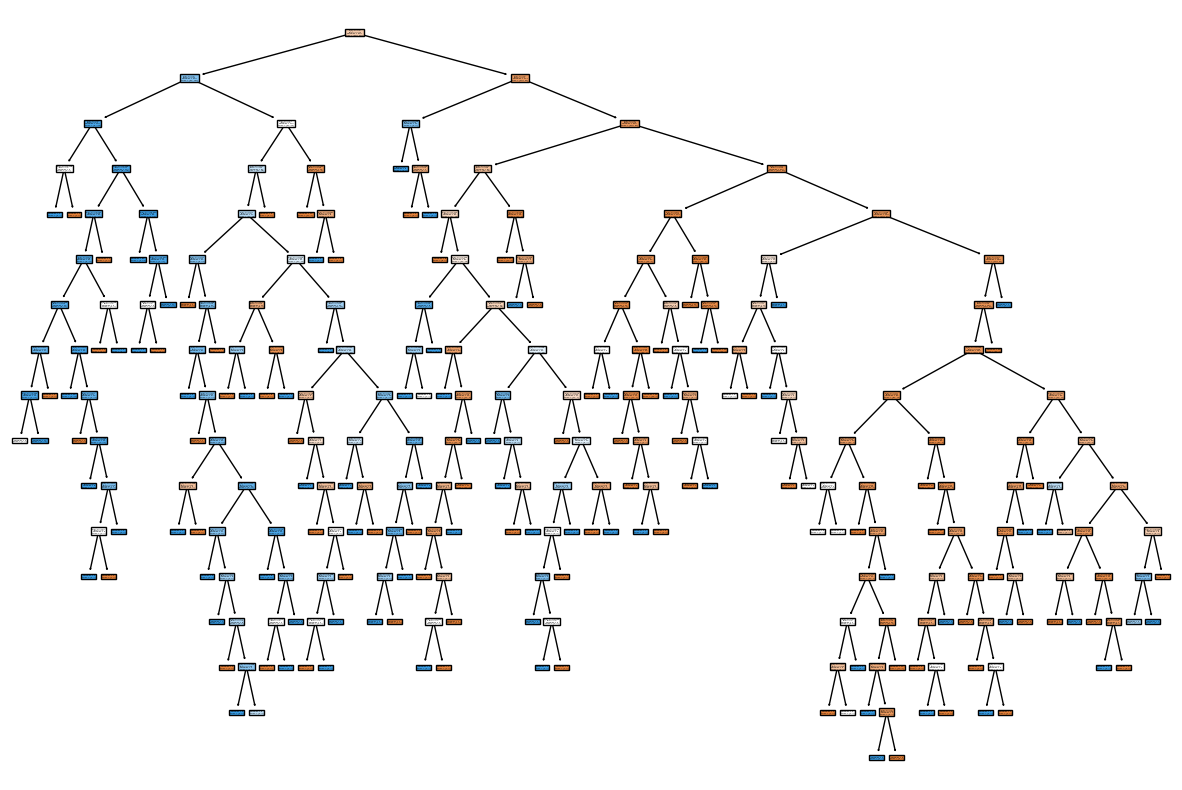

In [60]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()

# Evaluating our test dataset

In [63]:
from sklearn.metrics import classification_report,confusion_matrix

In [65]:
print(classification_report(y_test,predictions_test))
print(confusion_matrix(y_test,predictions_test))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.77      0.66      0.71       114

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268

[[132  22]
 [ 39  75]]


# Evaluating our training dataset

In [68]:
print(classification_report(y_train,predictions_train))
print(confusion_matrix(y_train,predictions_train))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       395
           1       0.99      0.96      0.97       228

    accuracy                           0.98       623
   macro avg       0.98      0.98      0.98       623
weighted avg       0.98      0.98      0.98       623

[[392   3]
 [  9 219]]


# Finding false positive rate and true positive rate

In [71]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

In [73]:
dt_probs = clf.predict_proba(x_test)[:,1]

In [75]:
dt_probs

array([0. , 1. , 1. , 1. , 0. , 0. , 0. , 0. , 1. , 1. , 0. , 0.5, 0. ,
       0. , 0. , 1. , 1. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ,
       0. , 0. , 1. , 0. , 0. , 1. , 0.6, 1. , 0. , 1. , 0. , 0. , 1. ,
       1. , 0. , 1. , 1. , 0. , 0. , 1. , 1. , 1. , 0. , 0. , 1. , 0. ,
       1. , 1. , 0.6, 0. , 0. , 0. , 0. , 1. , 1. , 0. , 0. , 0.6, 0. ,
       0. , 1. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. ,
       0. , 0. , 0. , 1. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ,
       1. , 1. , 1. , 1. , 1. , 1. , 0. , 0. , 1. , 0. , 1. , 0. , 0. ,
       0. , 1. , 0. , 0. , 1. , 0. , 0. , 1. , 1. , 0. , 1. , 0. , 1. ,
       0. , 0. , 0.6, 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ,
       1. , 0. , 1. , 0. , 0. , 0. , 1. , 0. , 0. , 1. , 0. , 1. , 0.5,
       0. , 1. , 0. , 1. , 1. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 1. ,
       1. , 1. , 1. , 1. , 0. , 0. , 1. , 0. , 0. , 1. , 0. , 1. , 0. ,
       0. , 1. , 0. , 1. , 1. , 0. , 0. , 1. , 1. , 0. , 0. , 0.

In [77]:
fpr_dt,tpr_dt,thresholds_dt = roc_curve(y_test,dt_probs)

In [81]:
str = "amazing"
str[1:6:2]

'mzn'

In [95]:
len(set(list("abcdef")).union(set(list("cdefghi"))))

9

In [129]:
A = input()
B = input()
set1 = set(A[int(len(A)/2):])
set2 = set(B)
if set1.issubset(set2):
    print(len(set(A+b)))


 abcde
 efghi


In [123]:
set1 = set(A[int(len(A)/2):])
set2 = set(B)

In [127]:
set1.issubset(set2)

True

{'c', 'd', 'e', 'f', 'g', 'h', 'i'}

In [133]:
for i in range(2.0):
    print(i)

TypeError: 'float' object cannot be interpreted as an integer

In [143]:
list(reversed(list("abc")))

['c', 'b', 'a']

In [145]:
for i in ''.join(reversed(list('abcd'))):
    print (i)

d
c
b
a


In [149]:
names = ['Amir', 'Bear', 'Charlton', 'Daman']
print(names[-1][-1])


n


In [161]:
a = [1,2,3]
a.extend([34,5])

In [163]:
a

[1, 2, 3, 34, 5]

In [169]:
list("a#b#c#d".split('#'))

['a', 'b', 'c', 'd']

In [181]:
def f(values):
    values[0] = 44
 
v = [1, 2, 3]
f(v)
print(v)

[44, 2, 3]


In [183]:
m = [[x, x + 1, x + 2] for x in range(0, 3)]
m

[[0, 1, 2], [1, 2, 3], [2, 3, 4]]

In [185]:
m = [[x, y] for x in range(0, 4) for y in range(0, 4)]   

In [189]:
len(m)

16

In [191]:
b=[2,3,4,5]
a=list(filter(lambda x:x%2,b))
print(a)

[3, 5]


In [199]:
word1="Apple"
word2="Apple"
list1=[1,2,3]
list2=[1,2,3]
print(word1 is word2)
print(list1 == list2)

True
True


In [201]:
-2//3

-1

In [203]:
-5//2

-3

In [205]:
5//2

2

In [217]:
import math
math.ceil(3/2)

2